In [1]:
import numpy as np
import time
import librosa
import soundfile
import sounddevice
import itertools

In [4]:
!pip install sounddevice

In [2]:
recording=False
class listener:
    """ 
    Merekam suara secara stream dan metode callback
    """
    def __init__(self):
        global cumulated_status, end_count, start_count, recording, magnitudo, audiodata
        self.thres=0
        self.startframe=5
        self.endframe=40
        self.start_count = 0
        self.end_count=0
        self.magnitudo=[]
        self.audiodata=[]
        self.high=2000
        self.low=100
        self.screenwidth=79
        self.gain=10
        self.DURATION=20
        self.recording = False
        self.samplerate = 16000.0
        self.length=10
    
    
    
    def record(self, length=1, filename=None, thres=0):
        global cumulated_status, end_count, start_count, recording, magnitudo, audiodata
        
        try:
            import sounddevice as sd

            #samplerate = sd.query_devices(args.device, 'input')['default_samplerate']
            

            self.delta_f = (self.high - self.low) / self.screenwidth
            self.fftsize = np.ceil(self.samplerate / self.delta_f).astype(int)
            self.low_bin = int(np.floor(self.low / self.delta_f))

            cumulated_status = sd.CallbackFlags()

            def callback(self, indata, frames, time):
                global cumulated_status, audiodata, magnitudo, end_count, start_count, recording


                #cumulated_status |= status
                if any(indata):
                    self.magnitude = np.abs(np.fft.rfft(self.indata[:, 0], n=fftsize))
                    self.magnitude *= self.gain / self.fftsize

                    self.rms = librosa.feature.rmse(S=indata)
                    self.rms = int(self.rms*32768)
                    self.start_count += 1

                    if self.rms>=self.thres:
                        self.end_count = 0
                        if not self.recording and (self.start_count > self.startframe):
                            self.recording = True
                            self.start_count = 0
                            print("X",end='')
                        else:
                            print("x",end='')
                    else:
                        if self.recording:
                            self.end_count += 1
                            print(".",end='')


                    if self.recording and (self.end_count >= self.endframe):
                        print("O",end='')
                        self.recording = False
                        self.end_count=0
                        self.start_count=0

                    if self.recording:
                        self.audiodata.extend(itertools.chain(indata.tolist()))
                        self.magnitudo.append(magnitude)
                    else:
                        print("_",end='')



            with sd.InputStream(device=None, channels=1, callback=callback,
                                blocksize=int(self.samplerate * self.DURATION / 1000),
                                samplerate=self.samplerate):
                while True:
                    #response = input()
                    #if response in ('', 'q', 'Q'):
                    time.sleep(self.length)
                    break

                for i in range((self.endframe - 6) * int(self.samplerate * self.DURATION / 1000)):
                    self.audiodata.pop()
                if filename!=None: soundfile.write(filename,self.audiodata,16000)

            if cumulated_status:
                logging.warning(str(cumulated_status))
        except Exception as e:
            print(e)
        

In [3]:
a = listener()

In [5]:
a.record(length=10,filename="temp.wav",thres=1100)

From cffi callback <function _StreamBase.__init__.<locals>.callback_ptr at 0x000001751DFEAC10>:
Traceback (most recent call last):
  File "C:\Anaconda3\envs\tf\lib\site-packages\sounddevice.py", line 840, in callback_ptr
    return _wrap_callback(callback, data, frames, time, status)
  File "C:\Anaconda3\envs\tf\lib\site-packages\sounddevice.py", line 2678, in _wrap_callback
    callback(*args)
  File "<ipython-input-2-35a37b621f13>", line 46, in callback
TypeError: 'int' object is not iterable


pop from empty list


In [1]:
len(audiodata)

NameError: name 'audiodata' is not defined

(48640, 1)


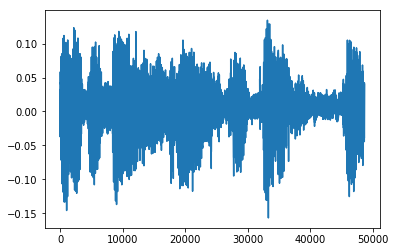

In [304]:
import matplotlib.pyplot as plt
a= np.array(audiodata)
plt.plot(a)
print(a.shape)
sounddevice.play(a, samplerate=16000)

In [255]:
a = a.reshape(a.shape[0])

(20, 217)